In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from mlxtend.evaluate import feature_importance_permutation


In [2]:
df = pd.read_csv('../data/Traffic_Crashes_-_Crashes.csv')

In [3]:
df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,00027e2894dd2f3fe4ff320a6d332d18e465b5c8ba2e79...,JC201794,NaN,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,4.0,0.0,16,4,3,41.994704,-87.699395,POINT (-87.699395085278 41.994703544264)
1,0002fb938eb0feaea33820fa55b71e4ea0b332125e1510...,JB175900,NaN,03/06/2018 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,3.0,0.0,15,3,3,41.904671,-87.716685,POINT (-87.716685434641 41.904671135876)
2,0003fc68d857da032b1beafa8f7893ce0b123ce6b2dee5...,HZ488533,NaN,10/25/2016 02:10:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,14,3,10,41.706808,-87.642771,POINT (-87.642771373276 41.706807861572)
3,00060f93d2ae8d4e4c7fe75ac17055dd69a081d0b928a5...,JD123586,NaN,01/21/2020 04:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,...,1.0,0.0,1.0,0.0,16,3,1,41.791610,-87.703356,POINT (-87.703355598231 41.791609871969)
4,0006882952e53c291df267014a03b57684383e9ad66d9e...,JC459747,NaN,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,12,6,10,41.848490,-87.675599,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398685,7412aff8ad5fd9fa02750ac5993cb59a43d609c13b36d4...,JB332535,NaN,07/02/2018 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,6.0,0.0,18,2,7,41.735715,-87.661993,POINT (-87.661992662801 41.735714804611)
398686,be972c2f9104860ba3b38c4208b74d1d92641736248e42...,JC346058,NaN,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,4.0,0.0,16,6,7,41.907814,-87.775408,POINT (-87.775408056534 41.907814460403)
398687,82aa5cd836d77c28cd50d157af9dd697307c975c8d3686...,JA237504,NaN,04/24/2017 04:30:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,16,2,4,41.791349,-87.723255,POINT (-87.723255322969 41.791349423725)
398688,855017044ca271cd0cfa23806a99ee664857857b8a5385...,JC240615,NaN,04/26/2019 07:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,19,6,4,41.877844,-87.646782,POINT (-87.646781834111 41.877843584048)


In [4]:
df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [5]:
df['LANE_CNT'].fillna(0.0, inplace=True)

In [6]:
df.fillna('UNKOWN', inplace=True)

In [7]:
df.drop(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'RD_NO', 'REPORT_TYPE', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 
         'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN', 'LONGITUDE', 'LATITUDE',
         'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL','INJURIES_INCAPACITATING', 
         'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'DAMAGE',
         'DATE_POLICE_NOTIFIED', 'CRASH_TYPE','NUM_UNITS','STREET_DIRECTION','STREET_NAME'], axis=1, inplace=True)

In [8]:
df

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,...,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,0.0,STRAIGHT AND LEVEL,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,4,3,POINT (-87.699395085278 41.994703544264)
1,03/06/2018 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,15,3,3,POINT (-87.716685434641 41.904671135876)
2,10/25/2016 02:10:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,...,Y,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,14,3,10,POINT (-87.642771373276 41.706807861572)
3,01/21/2020 04:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,FOUR WAY,0.0,STRAIGHT AND LEVEL,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,16,3,1,POINT (-87.703355598231 41.791609871969)
4,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,0.0,STRAIGHT AND LEVEL,...,UNKOWN,FOLLOWING TOO CLOSELY,IMPROPER TURNING/NO SIGNAL,UNKOWN,UNKOWN,UNKOWN,12,6,10,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398685,07/02/2018 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,18,2,7,POINT (-87.661992662801 41.735714804611)
398686,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,0.0,STRAIGHT AND LEVEL,...,UNKOWN,FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,UNKOWN,UNKOWN,UNKOWN,16,6,7,POINT (-87.775408056534 41.907814460403)
398687,04/24/2017 04:30:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,0.0,STRAIGHT AND LEVEL,...,Y,UNABLE TO DETERMINE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,2,4,POINT (-87.723255322969 41.791349423725)
398688,04/26/2019 07:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),0.0,STRAIGHT AND LEVEL,...,UNKOWN,FOLLOWING TOO CLOSELY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,19,6,4,POINT (-87.646781834111 41.877843584048)


In [9]:
list_ = [3, 9, 99, 39, 1, 2, 32, 33, 6, 24, 11, 34, 18, 12, 36, 7, 14, 16, 38, 31, 22, 23, 63, 4, 26]
for n in list_:
    df.drop(index=df[df['POSTED_SPEED_LIMIT'] == n].index, inplace=True)

In [10]:
df

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,...,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,0.0,STRAIGHT AND LEVEL,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,4,3,POINT (-87.699395085278 41.994703544264)
1,03/06/2018 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,15,3,3,POINT (-87.716685434641 41.904671135876)
2,10/25/2016 02:10:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,...,Y,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,14,3,10,POINT (-87.642771373276 41.706807861572)
3,01/21/2020 04:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,FOUR WAY,0.0,STRAIGHT AND LEVEL,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,16,3,1,POINT (-87.703355598231 41.791609871969)
4,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,0.0,STRAIGHT AND LEVEL,...,UNKOWN,FOLLOWING TOO CLOSELY,IMPROPER TURNING/NO SIGNAL,UNKOWN,UNKOWN,UNKOWN,12,6,10,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398685,07/02/2018 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,18,2,7,POINT (-87.661992662801 41.735714804611)
398686,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,0.0,STRAIGHT AND LEVEL,...,UNKOWN,FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,UNKOWN,UNKOWN,UNKOWN,16,6,7,POINT (-87.775408056534 41.907814460403)
398687,04/24/2017 04:30:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,0.0,STRAIGHT AND LEVEL,...,Y,UNABLE TO DETERMINE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,2,4,POINT (-87.723255322969 41.791349423725)
398688,04/26/2019 07:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),0.0,STRAIGHT AND LEVEL,...,UNKOWN,FOLLOWING TOO CLOSELY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,19,6,4,POINT (-87.646781834111 41.877843584048)


# OneHotEncoding: FIRST_CRASH_TYPE

In [11]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [12]:
# Creating a new dataframe for FIRST_CRASH_TYPE
# Then we will OneHotEncode the data to categories
crash_type = df['FIRST_CRASH_TYPE']
crash_df = pd.DataFrame(crash_type, columns=['FIRST_CRASH_TYPE'])
crash_df = pd.DataFrame(ohe.fit_transform(crash_df[['FIRST_CRASH_TYPE']]).toarray())

In [13]:
# Each column will be a FIRST_CRASH_TYPE, so we will need to label each column
crash_col = df['FIRST_CRASH_TYPE'].unique()
crash_df.columns = crash_col

In [14]:
crash_df.columns

Index(['ANGLE', 'SIDESWIPE SAME DIRECTION', 'REAR END', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION', 'FIXED OBJECT',
       'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE', 'REAR TO REAR',
       'TRAIN', 'OVERTURNED', 'ANIMAL'],
      dtype='object')

# LabelEncoding: FEATURES

In [15]:
# Here we select the features we want to use and LabelEncode them using a for loop
# We will also create a new dataframe for them
text_col = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 
            'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I',
            'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','DOORING_I', 'WORK_ZONE_I', 
            'WORK_ZONE_TYPE']
en_df = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    en_df[col] = encoder.fit_transform(df[col])
    
en_df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,8,3,0,1,1,1,1,18,26,1,1,3
1,4,3,2,3,8,3,0,1,1,1,1,36,36,1,1,3
2,16,6,2,3,8,3,0,1,1,1,2,36,36,1,1,3
3,4,3,2,3,6,3,0,1,2,1,1,36,36,1,1,3
4,16,1,2,3,8,3,0,1,2,1,1,19,24,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398281,4,3,2,3,8,3,0,2,1,1,1,36,36,1,1,3
398282,16,1,2,3,8,3,0,1,1,1,1,19,17,1,1,3
398283,4,3,2,3,12,3,0,5,1,1,2,36,26,1,1,3
398284,4,3,2,3,2,3,0,1,1,1,1,19,26,1,1,3


In [16]:
no_en_df = ['POSTED_SPEED_LIMIT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION']
no_en_df = pd.DataFrame(df[no_en_df])
no_en_df

,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,30,16,4,3,POINT (-87.699395085278 41.994703544264)
1,30,15,3,3,POINT (-87.716685434641 41.904671135876)
2,30,14,3,10,POINT (-87.642771373276 41.706807861572)
3,30,16,3,1,POINT (-87.703355598231 41.791609871969)
4,30,12,6,10,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...
398685,30,18,2,7,POINT (-87.661992662801 41.735714804611)
398686,30,16,6,7,POINT (-87.775408056534 41.907814460403)
398687,15,16,2,4,POINT (-87.723255322969 41.791349423725)
398688,30,19,6,4,POINT (-87.646781834111 41.877843584048)


In [17]:
# Merge the FIRST_CRASH_TYPE and the LabelEncoded dataframe together
df2 = pd.merge(crash_df, en_df, left_index=True, right_index=True)

In [18]:
# Here we have the Features and all Crash types 
df2.columns

Index(['ANGLE', 'SIDESWIPE SAME DIRECTION', 'REAR END', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION', 'FIXED OBJECT',
       'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE', 'REAR TO REAR',
       'TRAIN', 'OVERTURNED', 'ANIMAL', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'DOORING_I',
       'WORK_ZONE_I', 'WORK_ZONE_TYPE'],
      dtype='object')

In [19]:
df2

,ANGLE,SIDESWIPE SAME DIRECTION,REAR END,PEDESTRIAN,PARKED MOTOR VEHICLE,TURNING,HEAD ON,PEDALCYCLIST,SIDESWIPE OPPOSITE DIRECTION,OTHER NONCOLLISION,...,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,18,26,1,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,36,36,1,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,2,36,36,1,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,2,1,1,36,36,1,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,2,1,1,19,24,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,1,1,36,36,1,1,3
398282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,19,17,1,1,3
398283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,5,1,1,2,36,26,1,1,3
398284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,1,1,19,26,1,1,3


# Target: Rear End

In [20]:
# Defining our Features and Target
# For X, we want to remove all of the other CRASH types and keep the features.
y = df2['REAR END']
X = df2.drop(columns=['REAR END','ANGLE', 'SIDESWIPE SAME DIRECTION', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION',
       'FIXED OBJECT', 'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE',
       'REAR TO REAR', 'TRAIN', 'OVERTURNED', 'ANIMAL'], axis=1)


In [21]:
# Train and Test on a Vanilla model (test size to 20%)
dt_model = DecisionTreeClassifier(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [22]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [24]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)


In [25]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.978598867645028
Accuracy Score Test: 0.9491827562831103
ROC_AUC Test: 0.6030698428311908


## Feature Importance DTC

In [26]:
# Lets look at which feature is the most important
dt_model.feature_importances_

array([0.04712941, 0.03688977, 0.06528513, 0.0731335 , 0.19580236,
       0.03253467, 0.06312757, 0.05957491, 0.0336915 , 0.08174355,
       0.03469498, 0.14054641, 0.12390562, 0.00112367, 0.00512463,
       0.00569232])

In [27]:
# TRAFFICWAY_TYPE, PRIM_CONTRIBUTORY_CAUSE, SEC_CONTRIBUTORY_CAUSE, NOT_RIGHT_OF_WAY_I, 
# LIGHTING_CONDITION, WEATHER_CONDITION
# seems to be the most important
X

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,8,3,0,1,1,1,1,18,26,1,1,3
1,4,3,2,3,8,3,0,1,1,1,1,36,36,1,1,3
2,16,6,2,3,8,3,0,1,1,1,2,36,36,1,1,3
3,4,3,2,3,6,3,0,1,2,1,1,36,36,1,1,3
4,16,1,2,3,8,3,0,1,2,1,1,19,24,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398281,4,3,2,3,8,3,0,2,1,1,1,36,36,1,1,3
398282,16,1,2,3,8,3,0,1,1,1,1,19,17,1,1,3
398283,4,3,2,3,12,3,0,5,1,1,2,36,26,1,1,3
398284,4,3,2,3,2,3,0,1,1,1,1,19,26,1,1,3


Feature ranking:
1. feature 4 (0.195802)
2. feature 11 (0.140546)
3. feature 12 (0.123906)
4. feature 9 (0.081744)
5. feature 3 (0.073134)
6. feature 2 (0.065285)
7. feature 6 (0.063128)
8. feature 7 (0.059575)
9. feature 0 (0.047129)
10. feature 1 (0.036890)
11. feature 10 (0.034695)
12. feature 8 (0.033691)
13. feature 5 (0.032535)
14. feature 15 (0.005692)
15. feature 14 (0.005125)
16. feature 13 (0.001124)


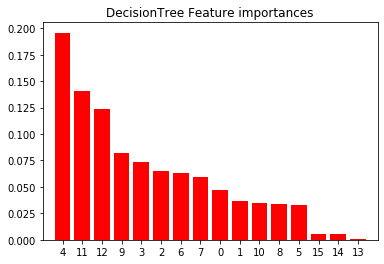

In [33]:
# Here we graph out which feature is the most imporant.

importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [34]:
# This plot tree helper function can plot the DecisionTreeClassifier 
# We can check what feature our model is splitting on and what are the requirements
def plot_tree(dt, used_cols, out_file='mytree.png'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

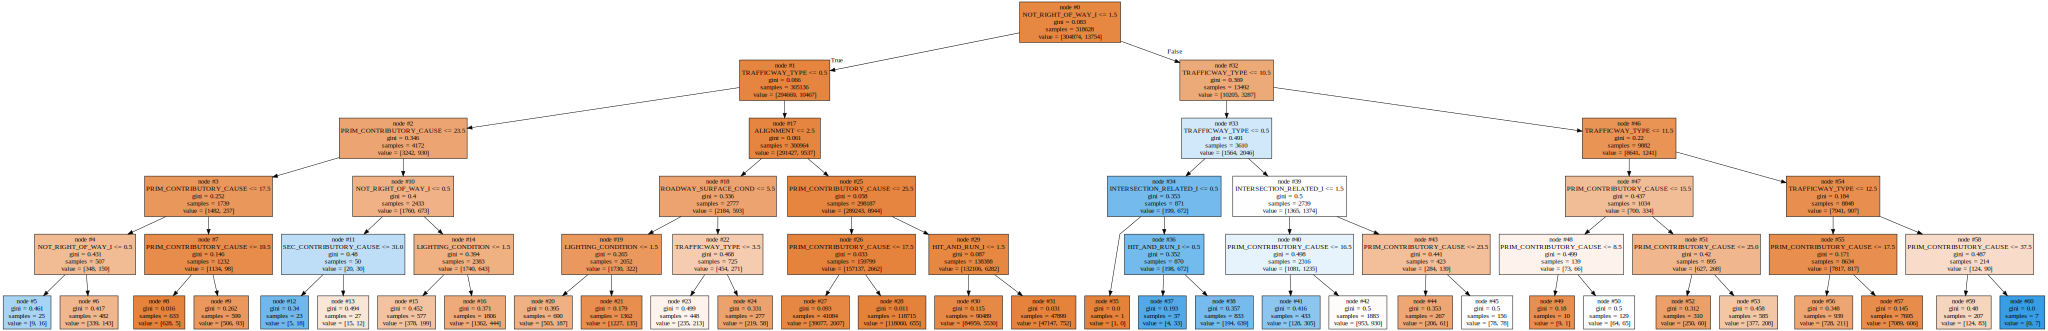

In [35]:
# Since we have a lot of data, lets only set max_depth=5
# This will speed up the process to graph
dt_model2 = DecisionTreeClassifier(random_state=1, max_depth=5)
dt_model2.fit(X_train, y_train)
plot_tree(dt_model2, X.columns.tolist())

### DTC(Rear End): w/ Parameters

In [36]:
# Changing the models parameters if we could get a better score
dt_model2 = DecisionTreeClassifier(random_state=1, max_depth=10, max_leaf_nodes=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [37]:
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [38]:
# Our scores
y_train_pred2 = dt_model2.predict(X_train)
y_test_pred2 = dt_model2.predict(X_test)
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred2)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred2)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred2)}')

Accuracy Score Train: 0.9596582848964937
Accuracy Score Test: 0.9597027291671897
ROC_AUC Test: 0.5696825262715062
